In [5]:
# Importing necessary libraries 
import tensorflow as tf
print(tf.config.list_physical_devices('GPU'))
import pandas as pd
import numpy as np
from sklearn.preprocessing import OneHotEncoder
import matplotlib.pylab as plt
import seaborn as sns
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import StandardScaler, LabelEncoder
from imblearn.over_sampling import SMOTE
from collections import Counter
from tensorflow.keras.models import Sequential
from tensorflow.keras.layers import Dense, Dropout
from tensorflow.keras.callbacks import EarlyStopping
from sklearn.metrics import classification_report
from sklearn.metrics import roc_auc_score, roc_curve, confusion_matrix, classification_report


[PhysicalDevice(name='/physical_device:GPU:0', device_type='GPU')]


The dataset is loaded using pd.read_csv. Then we use a label encoder to encode the categorical variables to numeric and checks for any missing values in the dataset. Handling of missing values can be done by getting rid of features that have more than 50% missing values in its column and further cleaned by dropping rows with any remaining missing values. 
/next we prints the percentage of each class (default vs. non-default) in the target column.  Then we calculates the absolute correlation of each feature with the target variable (TARGET) and features with low correlation ( less than 0.01) are removed, as they might not contribute much to the model's predictive power. A heatmap is plotted to visualize the correlations between the remaining features, which helps in understanding their relationships. Furthermore, since the dataset is likely imbalanced, SMOTE (Synthetic Minority Over-sampling Technique) is used to balance the classes. A count plot is used to visualize the distribution of the target variable after applying SMOTE. 
Finally, the data is split into training and testing sets. Feature scaling is applied to normalize the data. A deep learning model with several layers is built and trained. Early stopping is used to prevent overfitting. Sensitivity (also known as recall) is calculated to evaluate the model's performance on the positive class. The ROC curve is plotted, and the AUC (Area Under Curve) is computed to measure the model's discriminatory ability.

<>:20: SyntaxWarning: invalid escape sequence '\A'
<>:20: SyntaxWarning: invalid escape sequence '\A'
/tmp/ipykernel_692656/846868854.py:20: SyntaxWarning: invalid escape sequence '\A'
  print('Columns with N\A values:')


Training dataframe:
         SK_ID_CURR  TARGET NAME_CONTRACT_TYPE CODE_GENDER FLAG_OWN_CAR  \
0           100002       1         Cash loans           M            N   
1           100003       0         Cash loans           F            N   
2           100004       0    Revolving loans           M            Y   
3           100006       0         Cash loans           F            N   
4           100007       0         Cash loans           M            N   
...            ...     ...                ...         ...          ...   
307506      456251       0         Cash loans           M            N   
307507      456252       0         Cash loans           F            N   
307508      456253       0         Cash loans           F            N   
307509      456254       1         Cash loans           F            N   
307510      456255       0         Cash loans           F            N   

       FLAG_OWN_REALTY  CNT_CHILDREN  AMT_INCOME_TOTAL  AMT_CREDIT  \
0                   

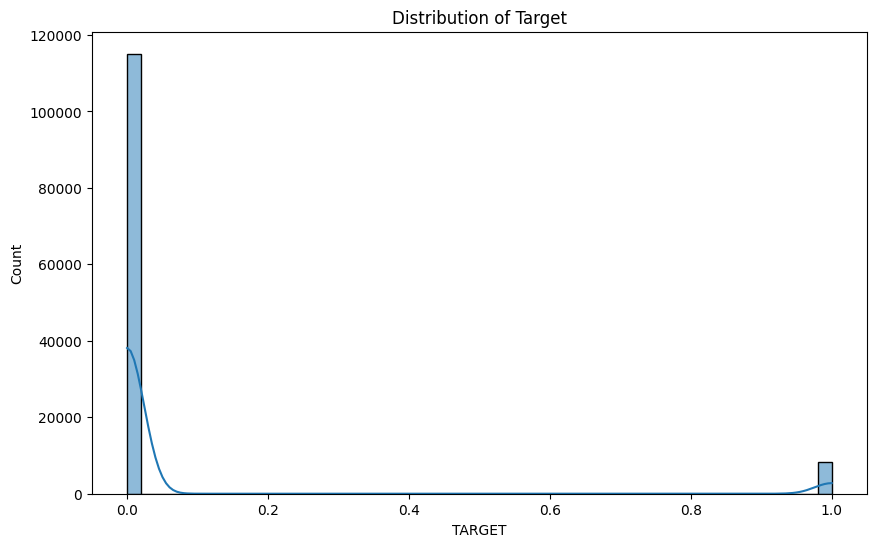

Correlation of features with TARGET:
 TARGET                        1.000000
EXT_SOURCE_3                  0.167817
EXT_SOURCE_2                  0.141163
DAYS_BIRTH                    0.071577
CODE_GENDER                   0.050533
                                ...   
REG_REGION_NOT_LIVE_REGION    0.000249
FLAG_DOCUMENT_5               0.000228
FLAG_DOCUMENT_19              0.000032
FLAG_MOBIL                         NaN
FLAG_DOCUMENT_2                    NaN
Name: TARGET, Length: 84, dtype: float64
Dataset shape after selecting correlated features: (123442, 84)


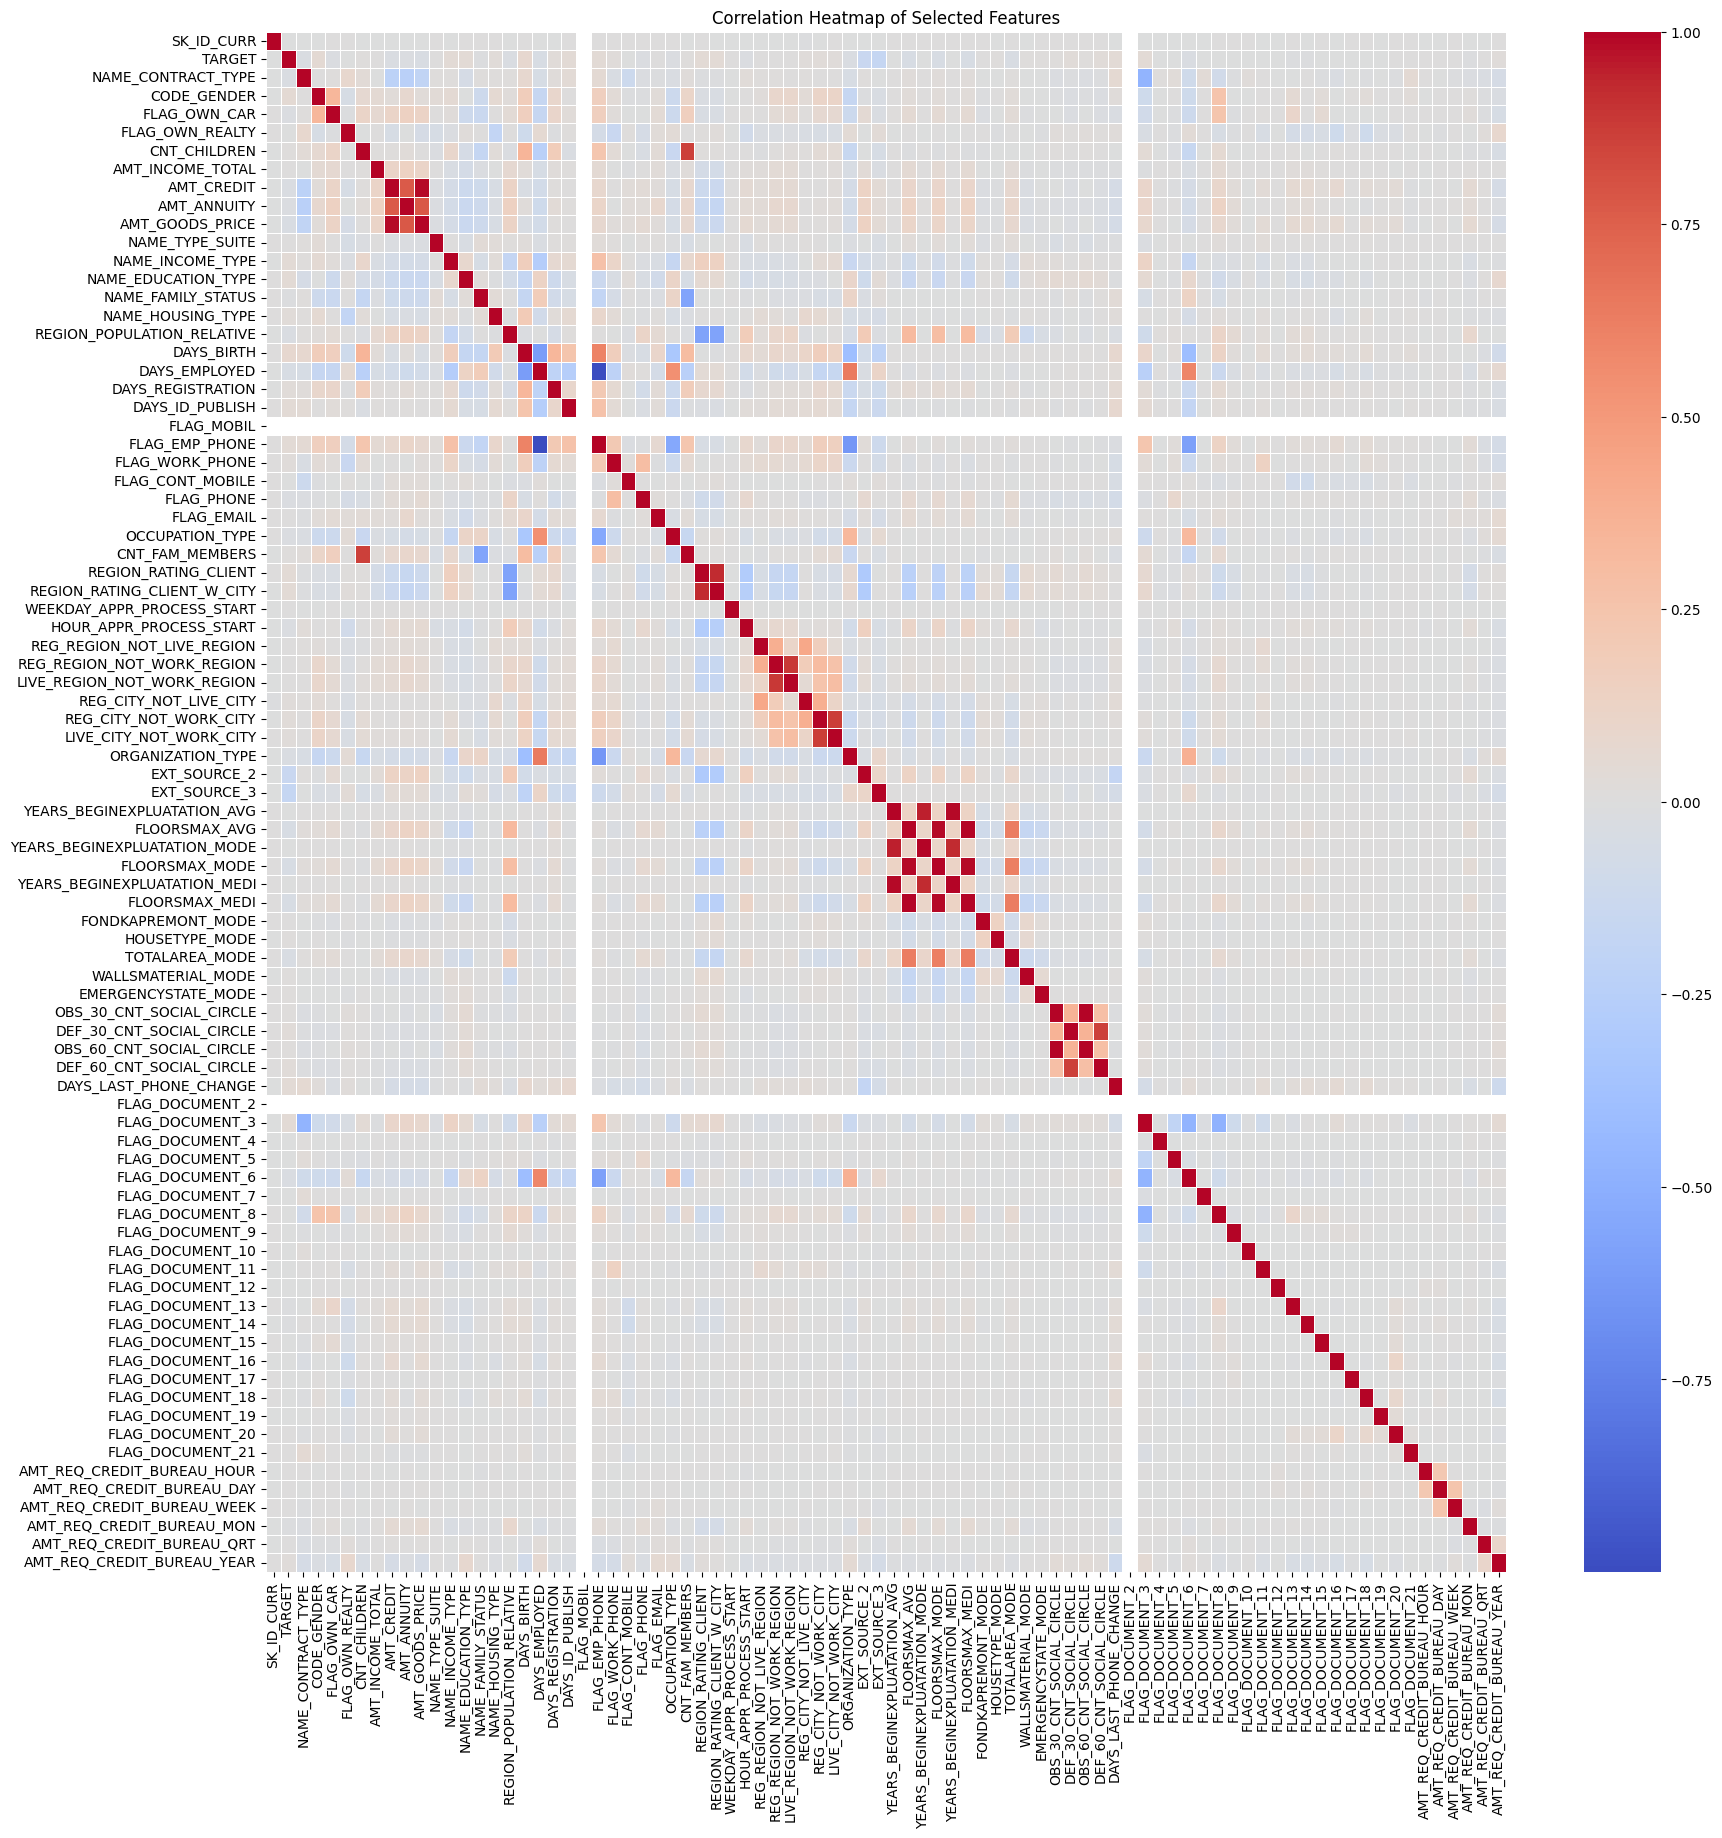

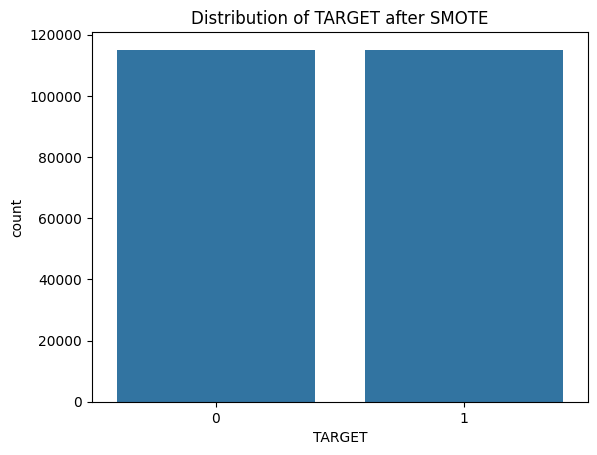

/home/rynem8/anaconda3/envs/py312/lib/python3.12/site-packages/keras/src/layers/core/dense.py:87: UserWarning: Do not pass an `input_shape`/`input_dim` argument to a layer. When using Sequential models, prefer using an `Input(shape)` object as the first layer in the model instead.
  super().__init__(activity_regularizer=activity_regularizer, **kwargs)


Epoch 1/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 5s 6ms/step - accuracy: 0.8052 - loss: 0.4237 - val_accuracy: 0.8636 - val_loss: 0.3197
Epoch 2/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 2ms/step - accuracy: 0.8720 - loss: 0.3063 - val_accuracy: 0.8773 - val_loss: 0.2946
Epoch 3/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 3ms/step - accuracy: 0.8839 - loss: 0.2817 - val_accuracy: 0.8842 - val_loss: 0.2806
Epoch 4/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 5ms/step - accuracy: 0.8921 - loss: 0.2656 - val_accuracy: 0.8895 - val_loss: 0.2697
Epoch 5/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 3s 4ms/step - accuracy: 0.8988 - loss: 0.2516 - val_accuracy: 0.8948 - val_loss: 0.2595
Epoch 6/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 2s 4ms/step - accuracy: 0.9032 - loss: 0.2418 - val_accuracy: 0.8976 - val_loss: 0.2544
Epoch 7/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9074 - loss: 0.2337 - val_accuracy: 0.8996 - val_loss: 0.2496
Epoch 8/30
630/630 ━━━━━━━━━━━━━━━━━━━━ 1s 1ms/step - accuracy: 0.9080 - loss: 0.2297 - val_accuracy: 0.

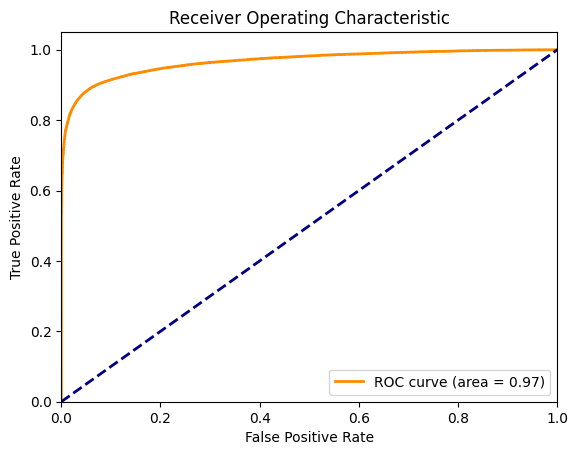

              precision    recall  f1-score   support

           0       0.89      0.95      0.92     34525
           1       0.94      0.89      0.91     34525

    accuracy                           0.92     69050
   macro avg       0.92      0.92      0.92     69050
weighted avg       0.92      0.92      0.92     69050



In [6]:
#Loading the dataset
rawIdata = pd.read_csv('loan_data.csv')
print('Training dataframe:\n',rawIdata)

# Encoding the columns that are required for the model
# Label encoding for categorical variables
label_encoders = {}
for column in rawIdata.columns:
    if rawIdata[column].dtype == 'object':
        le = LabelEncoder()
        rawIdata[column] = le.fit_transform(rawIdata[column])
        label_encoders[column] = le
print('Labels encoded:\n',label_encoders)
print('Training data-frame after encoding of categorical variables:\n',rawIdata)

# Exploratory Data Analysis (EDA)
#Check for missing, null and duplicate values 
print('Columns with Null values:')
print(rawIdata.isnull().sum())
print('Columns with N\A values:')
print(rawIdata.isna().sum())
print('Columns with duplicated values:')
print(rawIdata.duplicated().sum())

#  Clean the data by removing or correcting any errors
# Drop columns with more than 50% missing values
threshold = len(rawIdata) * 0.5
rawIdata = rawIdata.dropna(thresh=threshold, axis=1)
print(f"Dataset shape after dropping columns with more than 50% missing values: {rawIdata.shape}")

# Drop rows with any remaining missing values
rawIdata = rawIdata.dropna()
print(f"Dataset shape after dropping rows with missing values: {rawIdata.shape}")

# Printing the percentage of default to a payer of the dataset for the TARGET column
target_distribution = rawIdata['TARGET'].value_counts(normalize=True) * 100
print("Percentage of defaults (1) vs non-defaults (0):\n", target_distribution)

# Plot the distribution of Target
plt.figure(figsize=(10,6))
sns.histplot(rawIdata['TARGET'], bins=50, kde=True)
plt.title("Distribution of Target")
plt.show()

# Check correlation of features with the target
correlation = rawIdata.corr()['TARGET'].abs().sort_values(ascending=False)
print("Correlation of features with TARGET:\n", correlation)

# Select features that have a correlation of at least 0.01 with the target
correlated_features = correlation[correlation > 0.01].index
data = rawIdata[correlated_features]
print(f"Dataset shape after selecting correlated features: {rawIdata.shape}")

# Plot the correlation heatmap to visualize
plt.figure(figsize=(20, 20))
sns.heatmap(rawIdata.corr(), annot=False, cmap='coolwarm', linewidths=0.5)
plt.title("Correlation Heatmap of Selected Features")
plt.show()

# Balancing the dataset if the data is imbalanced
X = rawIdata.drop('TARGET', axis=1)
y = rawIdata['TARGET']

# Use SMOTE to handle class imbalance
smote = SMOTE(random_state=42)
X_res, y_res = smote.fit_resample(X, y)

# Plot the balanced or imbalanced data
sns.countplot(x=y_res)
plt.title("Distribution of TARGET after SMOTE")
plt.show()

# Splitting the data into training and testing sets
X_train, X_test, y_train, y_test = train_test_split(X_res, y_res, test_size=0.3, random_state=42, stratify=y_res)

# Standardize the features
scaler = StandardScaler()
X_train = scaler.fit_transform(X_train)
X_test = scaler.transform(X_test)

# Building the deep learning model
model = Sequential()
model.add(Dense(64, input_dim=X_train.shape[1], activation='relu'))
model.add(Dense(32, activation='relu'))
model.add(Dense(16, activation='relu'))
model.add(Dense(1, activation='sigmoid'))

# Compiling the model
model.compile(optimizer='adam', loss='binary_crossentropy', metrics=['accuracy'])

# Implementing early stopping
early_stopping = EarlyStopping(monitor='val_loss', patience=10, restore_best_weights=True)

# Train the model
history = model.fit(X_train, y_train, validation_data=(X_test, y_test), epochs=30, batch_size=256, callbacks=[early_stopping])

# Calculating sensitivity as a metric
# Sensitivity = TP / (TP + FN)
y_pred_prob = model.predict(X_test)
y_pred = (y_pred_prob > 0.5).astype(int)

conf_matrix = confusion_matrix(y_test, y_pred)
tp = conf_matrix[1, 1]
fn = conf_matrix[1, 0]
sensitivity = tp / (tp + fn)
print(f"Sensitivity: {sensitivity:.4f}")

# Calculate the area under the receiver operating characteristics curve
roc_auc = roc_auc_score(y_test, y_pred_prob)
print(f"ROC AUC Score: {roc_auc:.4f}")

# Plotting the ROC curve
fpr, tpr, thresholds = roc_curve(y_test, y_pred_prob)
plt.figure()
plt.plot(fpr, tpr, color='darkorange', lw=2, label='ROC curve (area = %0.2f)' % roc_auc)
plt.plot([0, 1], [0, 1], color='navy', lw=2, linestyle='--')
plt.xlim([0.0, 1.0])
plt.ylim([0.0, 1.05])
plt.xlabel('False Positive Rate')
plt.ylabel('True Positive Rate')
plt.title('Receiver Operating Characteristic')
plt.legend(loc="lower right")
plt.show()

# Print classification report for additional metrics
print(classification_report(y_test, y_pred))
